In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn;
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation);
#                  https://docs.python.org/3.10/ (Recommended version – 3.10).
# The Python Tutorial (python3.10): https://docs.python.org/3.10//tutorial/index.html

# Load Modules ---
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
# NumPy : The fundamental package for scientific computing with Python. NumPy is the fundamental package for scientific
#         computing in Python. It is a Python library that provides a multidimensional array object, various derived
#         objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays,
#         including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms,
#         basic linear algebra, basic statistical operations, random simulation and much more.
#     About: https://numpy.org/
#     Docs: https://numpy.org/doc/stable/
#     NumPy quickstart: https://numpy.org/doc/stable/user/quickstart.html

# Pandas: pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
#         built on top of the Python programming language.
#     About: https://pandas.pydata.org/
#     Docs: https://pandas.pydata.org/docs/
#     Getting started: https://pandas.pydata.org/docs/getting_started/index.html
#     User Guide: https://pandas.pydata.org/docs/user_guide/index.html#user-guide

# Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.
#       About: https://matplotlib.org/
#       Using Matplotlib (user guide): https://matplotlib.org/stable/users/index
#       Plot types: https://matplotlib.org/stable/plot_types/index
#       Tutorials: https://matplotlib.org/stable/tutorials/index
#       Examples: https://matplotlib.org/stable/gallery/index
#       API Reference: https://matplotlib.org/stable/api/index

# Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a
#          high-level interface for drawing attractive and informative statistical graphics.
#   About: https://seaborn.pydata.org/

print('numpy version:',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version:',sns.__version__)
print('pyplot: ',plt)

Python 3.10.12
numpy version: 1.23.5
pandas version:  1.5.3
seaborn version: 0.12.2
pyplot:  <module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>


# [Preprocessing Data](https://scikit-learn.org/stable/modules/preprocessing.html) (Data Standardization) - Scaling and [Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

### Build Sample Data ([numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html))

In [2]:
# make build sample array
array=np.array(
#     column 1    column 2    column 3
    [[     -5,        -4,         -3],                                          # row 1
     [     -2,        -1,          0],                                          # row 2
     [      1,         2,          3],],                                        # row 3
    dtype=np.float32                                                            # array data type - float 32-bits
)

print('Sample array:\n',array)                                                  # make print array

Sample array:
 [[-5. -4. -3.]
 [-2. -1.  0.]
 [ 1.  2.  3.]]


In [3]:
# print stats of sample array
print('Sample array dtype:',array.dtype)                                        # data type of sample array
print('Sample array shape:',array.shape)                                        # shape of array - (rows, columns)
print('Sample array number of dimension:',array.ndim)                           # dimensionality of array
print('Maximum value in array:',array.max())                                    # maximum along a given axis
print('Minimum value in array:',array.min())                                    # minimum along a given axis
print('Mean value of array:',array.mean())                                      # average (mean) of the array elements along given axis
print('Standard deviation value of array:',array.std())                         # standard deviation of the array elements along given axis

Sample array dtype: float32
Sample array shape: (3, 3)
Sample array number of dimension: 2
Maximum value in array: 3.0
Minimum value in array: -5.0
Mean value of array: -1.0
Standard deviation value of array: 2.5819888


### [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) (Scaling)

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```
where min, max = feature_range.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [4]:
from sklearn.preprocessing import MinMaxScaler                                  # load MinMaxScaler class
# make mimax scaler array between 0 and 1
mimax_scaler=MinMaxScaler()                                                     # make scaler object (default range - feature_range=(0,1))
mimax_scaler.fit(array)                                                         # fit data to scaler object
minmax_scaled_array=mimax_scaler.transform(array)                               # apply scaler on array
print('Scaled array:\n',minmax_scaled_array)                                    # scaled array feature-wise (column-wise)

Scaled array:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [5]:
# print stats of scaled array
print('Scaled array dtype:',minmax_scaled_array.dtype)                          # data type of sample array
print('Scaled array shape:',minmax_scaled_array.shape)                          # shape of array - (rows, columns)
print('Scaled array number of dimension:',minmax_scaled_array.ndim)             # dimensionality of array
print('Maximum value in scaled array:',minmax_scaled_array.max())               # maximum along a given axis
print('Minimum value in scaled array:',minmax_scaled_array.min())               # minimum along a given axis
print('Mean value of scaled array:',minmax_scaled_array.mean())                 # average (mean) of the array elements along given axis
print('Standard deviation value of scaled array:',minmax_scaled_array.std())    # standard deviation of the array elements along given axis

Scaled array dtype: float32
Scaled array shape: (3, 3)
Scaled array number of dimension: 2
Maximum value in scaled array: 1.0
Minimum value in scaled array: 0.0
Mean value of scaled array: 0.5
Standard deviation value of scaled array: 0.4082483


In [6]:
# manually minmax scaling (feature-wise / column-wise) as -
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X_scaled = X_std * (max - min) + min
# make apply fit method - calculate feature-wise / column-wise minimum and maximum value
maximum_value_to_sacle=1                                                        # maximum value to which scale
minimum_value_to_scale=0                                                        # minimum value to which scale
array_minimum_featurewise=array.min(axis=0).reshape(-1,array.shape[1])          # calculate column-wise minimum and reshape array to 2-d with
                                                                                # same number of dimension as orginal
array_maximum_featurewise=array.max(axis=0).reshape(-1,array.shape[1])          # calculate column-wise maximum and reshape array to 2-d
# make apply transform method - scale values to given range
array_standard=(array-array_minimum_featurewise)/(array_maximum_featurewise-array_minimum_featurewise)# calculate standard array (scaled between 0 and 1)
minmax_scaled_array_manual=array_standard*(maximum_value_to_sacle-minimum_value_to_scale)+minimum_value_to_scale# make manually minmax scale
print('Manually Scaled array:\n',minmax_scaled_array_manual)                    # manually scaled array feature-wise (column-wise)

Manually Scaled array:
 [[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


In [7]:
# check both array - manually and by sklearn.preprocessing.MinMaxScaler are sample or not
np.allclose(minmax_scaled_array,minmax_scaled_array_manual)                     # True if two arrays are element-wise equal within a tolerance

True

In [8]:
# make mimax scaler array between -1 and 1
mimax_scaler__11=MinMaxScaler(feature_range=(-1,1))                             # make scaler object (default range - feature_range=(0,1))
mimax_scaler__11.fit(array)                                                     # fit data to scaler object
minmax_scaled_array__11=mimax_scaler__11.transform(array)                       # apply scaler on array
print('Scaled array:\n',minmax_scaled_array__11)                                # scaled array feature-wise (column-wise)

Scaled array:
 [[-1.0000000e+00 -1.0000000e+00 -1.0000000e+00]
 [ 5.9604645e-08  2.9802322e-08  0.0000000e+00]
 [ 1.0000001e+00  1.0000000e+00  1.0000000e+00]]


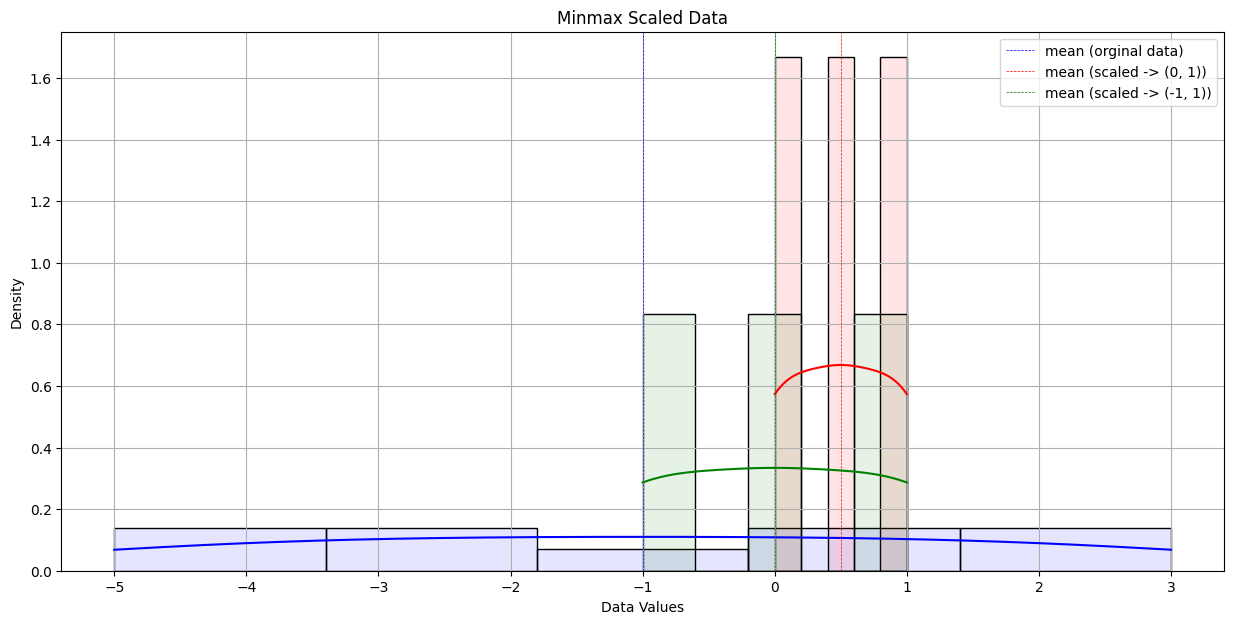

In [9]:
# make plot sacled and unscaled data
plt.figure(figsize=(15,7))                                                      # make plot and set figure size
# source (matplotlib.pyplot.figure): https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
# figsize(float, float), default: rcParams["figure.figsize"] (default: [6.4, 4.8]) - width (x-axis) and height (y-axis) in inches.
# make plot - orginal data
sns.histplot(x=array.reshape(-1),color='blue',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=array.mean(),label='mean (orginal data)',color='b',ls='--',lw=0.5)# make vertical line to mark mean
# here (matplotlib.pyplot.axvline) (source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html):
#   ls or linestyle : line style ; supported values are : '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', and 'dotted'
#   lw or linewidth : line width

# make plot - scaled between 0 and 1
sns.histplot(x=minmax_scaled_array.reshape(-1),color='red',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=minmax_scaled_array.mean(),label='mean (scaled -> (0, 1))',color='r',ls='--',lw=0.5)# make vertical line to mark mean

# make plot - scaled between 0 and 1
sns.histplot(x=minmax_scaled_array__11.reshape(-1),color='green',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=minmax_scaled_array__11.mean(),label='mean (scaled -> (-1, 1))',color='g',ls='--',lw=0.5)# make vertical line to mark mean

plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Minmax Scaled Data')                                                 # add title
plt.savefig('minmax_scaled.png',dpi=480)                                        # make save figure
plt.show()                                                                      # make show plot

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (Scaling) - Sample Data

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:
```
z = (x - u) / s
```
where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

In [16]:
from sklearn.preprocessing import StandardScaler                                # load StandardScaler class
standard_scaler=StandardScaler()                                                # make standard scaler object
standard_scaler.fit(array)                                                      # fit data to scaler object
standard_scaled_array=standard_scaler.transform(array)                          # apply scaler on array
print('Scaled array:\n',standard_scaled_array)                                  # scaled array feature-wise (column-wise)

Scaled array:
 [[-1.2247449 -1.2247449 -1.2247449]
 [ 0.         0.         0.       ]
 [ 1.2247449  1.2247449  1.2247449]]


In [17]:
# print stats of scaled array
print('Scaled array dtype:',standard_scaled_array.dtype)                        # data type of sample array
print('Scaled array shape:',standard_scaled_array.shape)                        # shape of array - (rows, columns)
print('Scaled array number of dimension:',standard_scaled_array.ndim)           # dimensionality of array
print('Maximum value in scaled array:',standard_scaled_array.max())             # maximum along a given axis
print('Minimum value in scaled array:',standard_scaled_array.min())             # minimum along a given axis
print('Mean value of scaled array:',standard_scaled_array.mean())               # average (mean) of the array elements along given axis
print('Standard deviation value of scaled array:',standard_scaled_array.std())  # standard deviation of the array elements along given axis

Scaled array dtype: float32
Scaled array shape: (3, 3)
Scaled array number of dimension: 2
Maximum value in scaled array: 1.2247449
Minimum value in scaled array: -1.2247449
Mean value of scaled array: -1.3245477e-08
Standard deviation value of scaled array: 1.0


In [19]:
# manually minmax scaling (feature-wise / column-wise) as -
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or
# one if with_std = False.
# make apply fit method - calculate mean and standard deviation column-wise
mean=array.mean(axis=0).reshape(-1,array.shape[1])                              # calculate mean and reshape array to 2-d with same number of
                                                                                # dimension as orginal
std=array.std(axis=0).reshape(-1,array.shape[1])                                # calculate standard deviation and reshape array to 2-d
# make apply transform method - scale values to given range
standard_scaled_array_manual=(array-mean)/std                                   # make manually standard scaled
print('Manually Scaled array:\n',standard_scaled_array_manual)                  # manually scaled array feature-wise (column-wise)

Manually Scaled array:
 [[-1.2247448 -1.2247448 -1.2247448]
 [ 0.         0.         0.       ]
 [ 1.2247448  1.2247448  1.2247448]]


In [20]:
# check both array - manually and by sklearn.preprocessing.StandardScaler are sample or not
np.allclose(standard_scaled_array,standard_scaled_array_manual)                 # True if two arrays are element-wise equal within a tolerance

True

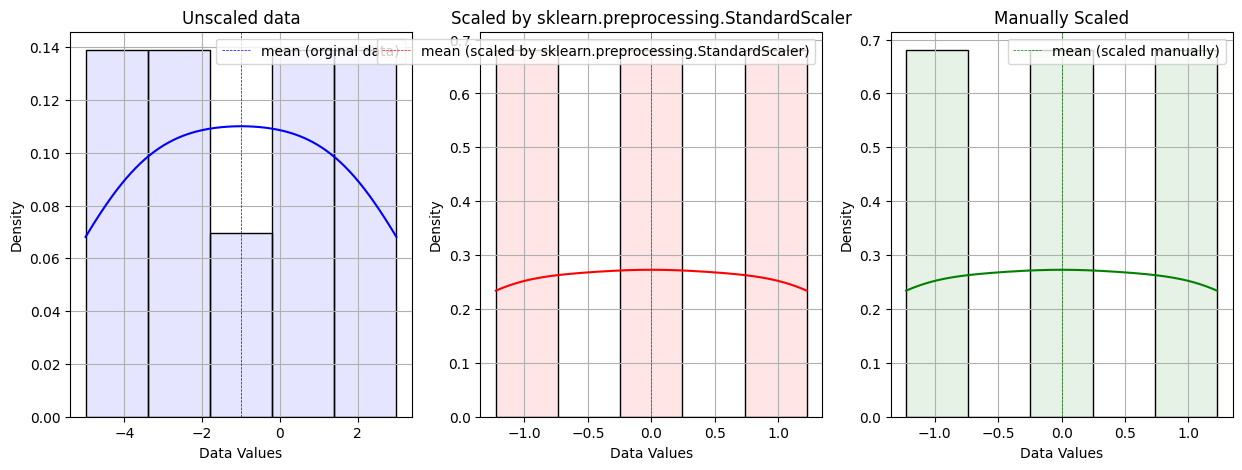

In [24]:
# make plot sacled and unscaled data
plt.figure(figsize=(15,5))                                                      # make plot and set figure size

# make plot unscaled data
plt.subplot(1,3,1)                                                              # make subplot - 1 row, 3 columns and plot index 1
sns.histplot(x=array.reshape(-1),color='blue',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=array.mean(),label='mean (orginal data)',color='b',ls='--',lw=0.5)# make vertical line to mark mean
plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Unscaled data')                                                      # add title to plot

# make plot scaled data by sklearn.preprocessing.StandardScaler
plt.subplot(1,3,2)                                                              # make subplot - 1 row, 3 columns and plot index 2
sns.histplot(x=standard_scaled_array.reshape(-1),color='red',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=standard_scaled_array.mean(),label='mean (scaled by sklearn.preprocessing.StandardScaler)',color='r',ls='--',lw=0.5)# make vertical line to mark mean
plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Scaled by sklearn.preprocessing.StandardScaler')                     # add title to plot

# make plot scaled data manually scaled
plt.subplot(1,3,3)                                                              # make subplot - 1 row, 3 columns and plot index 3
sns.histplot(x=standard_scaled_array_manual.reshape(-1),color='green',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=standard_scaled_array_manual.mean(),label='mean (scaled manually)',color='g',ls='--',lw=0.5)# make vertical line to mark mean
plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Manually Scaled')                                                    # add title to plot

plt.savefig('standard_scaled.png',dpi=480)                                      # make save figure
plt.show()                                                                      # make show plot

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (Scaling) - [Continuous Uniform Distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)

In [67]:
# make generate uniform probability distribution data
uniform_data=np.random.uniform(size=1_000_000).reshape(1000,1000)               # generate 1 million values (1000 rows , 1000 columns)
from sklearn.preprocessing import StandardScaler                                # load StandardScaler class
standard_scaler=StandardScaler()                                                # make standard scaler object
scaled_uniform_data=standard_scaler.fit_transform(uniform_data)                 # make fit and transform uniform data

In [68]:
print('Mean (orginal data)              :',uniform_data.mean())                 # mean of original data
print('Mean (scaled data)               :',scaled_uniform_data.mean())          # mean of scaled data
print('Standard deviation (orginal data):',uniform_data.std())                  # standard deviation of original data
print('Standard deviation (scaled data) :',scaled_uniform_data.std())           # standard deviation of scaled data
print('Maximum value (orginal data)     :',uniform_data.max())                  # maximum of original data
print('Maximum value (scaled data)      :',scaled_uniform_data.max())           # maximum of scaled data
print('Minumum value (orginal data)     :',uniform_data.min())                  # minimum of original data
print('Minumum value (scaled data)      :',scaled_uniform_data.min())           # minimum of scaled data

Mean (orginal data)              : 0.4995337406003401
Mean (scaled data)               : 6.66275923322246e-17
Standard deviation (orginal data): 0.28869424463242765
Standard deviation (scaled data) : 1.0
Maximum value (orginal data)     : 0.9999999493036469
Maximum value (scaled data)      : 1.858186341309165
Minumum value (orginal data)     : 8.861278296690145e-07
Minumum value (scaled data)      : -1.849274572138027


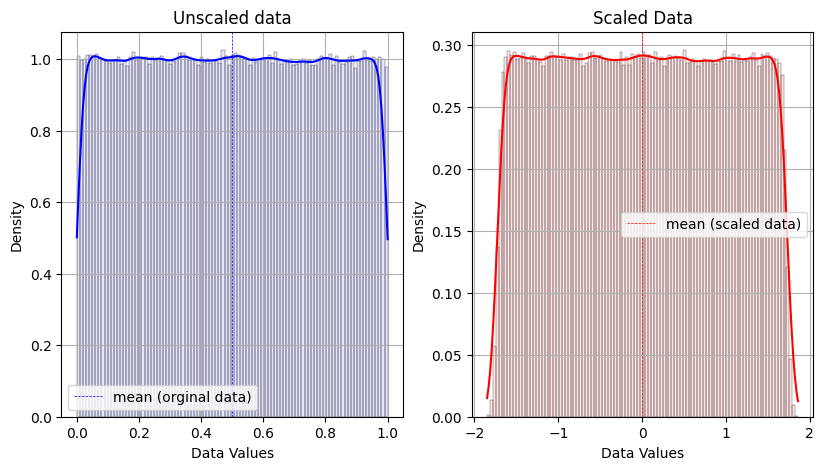

In [69]:
# make plot sacled and unscaled data
plt.figure(figsize=(15,5))                                                      # make plot and set figure size

# make plot unscaled data
plt.subplot(1,3,1)                                                              # make subplot - 1 row, 3 columns and plot index 1
sns.histplot(x=uniform_data.flatten(),color='blue',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=uniform_data.flatten().mean(),label='mean (orginal data)',color='b',ls='--',lw=0.5)# make vertical line to mark mean
plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Unscaled data')                                                      # add title to plot

# make plot scaled data by sklearn.preprocessing.StandardScaler
plt.subplot(1,3,2)                                                              # make subplot - 1 row, 3 columns and plot index 2
sns.histplot(x=scaled_uniform_data.flatten(),color='red',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=scaled_uniform_data.flatten().mean(),label='mean (scaled data)',color='r',ls='--',lw=0.5)# make vertical line to mark mean
plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Scaled Data')                                                        # add title to plot

plt.savefig('uniform_standard_scaled.png',dpi=480)                              # make save figure
plt.show()                                                                      # make show plot

### [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) (Scaling) - [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) using [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)

In [70]:
# generate binomial data using normal probability distribution
binomial_data=np.concatenate(                                                   # concatenate arrays - two different probability distributions
    (np.random.normal(loc=-2.0,scale=1.0,size=500_000),                         # 5,00,000 (half-million) value with mean -> -2.0 and standard deviation -> 1.0
     np.random.normal(loc=0.0,scale=0.5,size=500_000),)                         # 5,00,000 (half-million) value with mean -> 0.0 and standard deviation -> 0.5
    ).reshape(1000,1000)                                                        # (1000 rows , 1000 columns)
np.random.shuffle(binomial_data)                                                # make data random shuffle
from sklearn.preprocessing import StandardScaler                                # load StandardScaler class
standard_scaler=StandardScaler()                                                # make standard scaler object
scaled_binomial_data=standard_scaler.fit_transform(binomial_data)               # make fit and transform binomial data

In [71]:
print('Mean (orginal data)              :',binomial_data.mean())                # mean of original data
print('Mean (scaled data)               :',scaled_binomial_data.mean())         # mean of scaled data
print('Standard deviation (orginal data):',binomial_data.std())                 # standard deviation of original data
print('Standard deviation (scaled data) :',scaled_binomial_data.std())          # standard deviation of scaled data
print('Maximum value (orginal data)     :',binomial_data.max())                 # maximum of original data
print('Maximum value (scaled data)      :',scaled_binomial_data.max())          # maximum of scaled data
print('Minumum value (orginal data)     :',binomial_data.min())                 # minimum of original data
print('Minumum value (scaled data)      :',scaled_binomial_data.min())          # minimum of scaled data

Mean (orginal data)              : -1.000920130517943
Mean (scaled data)               : 2.1941559680271894e-17
Standard deviation (orginal data): 1.2753136311606876
Standard deviation (scaled data) : 1.0000000000000002
Maximum value (orginal data)     : 2.4889533197615057
Maximum value (scaled data)      : 2.7812396124380907
Minumum value (orginal data)     : -6.627104305948517
Minumum value (scaled data)      : -4.474122719553461


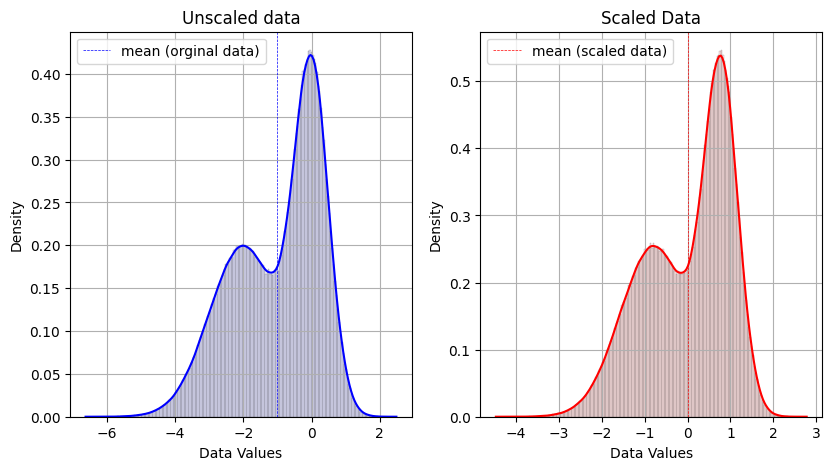

In [73]:
# make plot sacled and unscaled data
plt.figure(figsize=(15,5))                                                      # make plot and set figure size

# make plot unscaled data
plt.subplot(1,3,1)                                                              # make subplot - 1 row, 3 columns and plot index 1
sns.histplot(x=binomial_data.flatten(),color='blue',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=binomial_data.flatten().mean(),label='mean (orginal data)',color='b',ls='--',lw=0.5)# make vertical line to mark mean
plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Unscaled data')                                                      # add title to plot

# make plot scaled data by sklearn.preprocessing.StandardScaler
plt.subplot(1,3,2)                                                              # make subplot - 1 row, 3 columns and plot index 2
sns.histplot(x=scaled_binomial_data.flatten(),color='red',kde=True,stat='density',bins='auto',element='bars',alpha=0.1)
plt.axvline(x=scaled_binomial_data.flatten().mean(),label='mean (scaled data)',color='r',ls='--',lw=0.5)# make vertical line to mark mean
plt.legend()                                                                    # make plot labels space
plt.grid()                                                                      # make plot grid
plt.xlabel('Data Values')                                                       # add x-axis label
plt.title('Scaled Data')                                                        # add title to plot

plt.savefig('binomial_standard_scaled.png',dpi=480)                             # make save figure
plt.show()                                                                      # make show plot

### [normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html) (Normalization) - l1, l2 and max

Scale input vectors individually to unit norm (vector length).



In [103]:
from sklearn.preprocessing import normalize                                     # load `normalize` function

#### l1 normalization

```
normalizer = Σ |x|                        # absolute sum of each value
normalized_X = X / normalizer
```

In [104]:
l1_normalize_sample_wise=normalize(array,norm='l1')                             # make l1 normalized data, default sample wise (axis = 1)
# norm : {'l1', 'l2', 'max'}, default='l2'
#    The norm to use to normalize each non zero sample (or each non-zero feature if axis is 0).
# axis : {0, 1}, default=1
#   Define axis used to normalize the data along. If 1, independently normalize each sample, otherwise (if 0) normalize each feature.
print('l1 normalized data:\n',l1_normalize_sample_wise)                         # make print l1 normalized data

l1 normalized data:
 [[-0.41666666 -0.33333334 -0.25      ]
 [-0.6666667  -0.33333334  0.        ]
 [ 0.16666667  0.33333334  0.5       ]]


In [105]:
print('Mean (orginal data)                     :',array.mean())                 # mean of original data
print('Mean (l1 normalized data)               :',l1_normalize_sample_wise.mean())# mean of scaled data
print('Standard deviation (orginal data)       :',array.std())                  # standard deviation of original data
print('Standard deviation (l1 normalized data) :',l1_normalize_sample_wise.std())# standard deviation of scaled data
print('Maximum value (orginal data)            :',array.max())                  # maximum of original data
print('Maximum value (l1 normalized data)      :',l1_normalize_sample_wise.max())# maximum of scaled data
print('Minumum value (l1 normalized data)      :',array.min())                  # minimum of original data
print('Minumum value (l1 normalized data)      :',l1_normalize_sample_wise.min())# minimum of scaled data

Mean (orginal data)                     : -1.0
Mean (l1 normalized data)               : -0.11111113
Standard deviation (orginal data)       : 2.5819888
Standard deviation (l1 normalized data) : 0.3621779
Maximum value (orginal data)            : 3.0
Maximum value (l1 normalized data)      : 0.5
Minumum value (l1 normalized data)      : -5.0
Minumum value (l1 normalized data)      : -0.6666667


In [106]:
# manually l1 sample wise (axis = 1) normalize data as
# array / absolute_sum(array, axis = 1)
l1_sample_wise_normalizer=(np.abs(array).sum(axis=1)).reshape(array.shape[0],-1)# get normalizer - absolute sum column-wise
l1_normalize_sample_wise_manually=array/l1_sample_wise_normalizer               # make manually l1 normalize (sample wise) data

In [107]:
# check both array - manually and by sklearn.preprocessing.normalize are sample or not
np.allclose(l1_normalize_sample_wise,l1_normalize_sample_wise_manually)         # True if two arrays are element-wise equal within a tolerance

True

#### l2 normalization

```
normalizer =  √ (Σ x^2)                     # square root of sum of square of each value
normalized_X = X / normalizer
```

In [111]:
l2_normalize_feature_wise=normalize(array,axis=0)                               # make l2 normalized data, feature wise (norm = 'l2')
# norm : {'l1', 'l2', 'max'}, default='l2'
#    The norm to use to normalize each non zero sample (or each non-zero feature if axis is 0).
# axis : {0, 1}, default=1
#   Define axis used to normalize the data along. If 1, independently normalize each sample, otherwise (if 0) normalize each feature.
print('l2 normalized data:\n',l2_normalize_feature_wise)                        # make print l2 normalized data

l2 normalized data:
 [[-0.9128709  -0.8728715  -0.7071068 ]
 [-0.36514837 -0.21821788  0.        ]
 [ 0.18257418  0.43643576  0.7071068 ]]


In [112]:
print('Mean (orginal data)                     :',array.mean())                 # mean of original data
print('Mean (l2 normalized data)               :',l2_normalize_feature_wise.mean())# mean of scaled data
print('Standard deviation (orginal data)       :',array.std())                  # standard deviation of original data
print('Standard deviation (l1 normalized data) :',l2_normalize_feature_wise.std())# standard deviation of scaled data
print('Maximum value (orginal data)            :',array.max())                  # maximum of original data
print('Maximum value (l2 normalized data)      :',l2_normalize_feature_wise.max())# maximum of scaled data
print('Minumum value (l2 normalized data)      :',array.min())                  # minimum of original data
print('Minumum value (l2 normalized data)      :',l2_normalize_feature_wise.min())# minimum of scaled data

Mean (orginal data)                     : -1.0
Mean (l2 normalized data)               : -0.19445539
Standard deviation (orginal data)       : 2.5819888
Standard deviation (l1 normalized data) : 0.5436179
Maximum value (orginal data)            : 3.0
Maximum value (l2 normalized data)      : 0.7071068
Minumum value (l2 normalized data)      : -5.0
Minumum value (l2 normalized data)      : -0.9128709


In [123]:
# manually l2 feature wise (axis = 0) normalize data as
# array / absolute_sum(array, axis = 0)
l2_feature_wise_normalizer=np.sqrt(np.square(array).sum(axis=0)).reshape(-1,array.shape[0])# get normalizer - absolute sum sample-wise
l2_normalize_feature_wise_manually=array/l2_feature_wise_normalizer             # make manually l2 normalize (feature wise) data

In [124]:
# check both array - manually and by sklearn.preprocessing.normalize are sample or not
np.allclose(l2_normalize_feature_wise,l2_normalize_feature_wise_manually)       # True if two arrays are element-wise equal within a tolerance

True

#### max normalization

```
normalizer =  maximum(X)                   # maximum value of all values
normalized_X = X / normalizer
```

In [125]:
maxed_normalized_array,normalizers=normalize(array,'max',return_norm=True)      # make max normalized data, default sample wise (axis = 1)
                                                                                # make return normalizing values also
# norm : {'l1', 'l2', 'max'}, default='l2'
#    The norm to use to normalize each non zero sample (or each non-zero feature if axis is 0).
# axis : {0, 1}, default=1
#   Define axis used to normalize the data along. If 1, independently normalize each sample, otherwise (if 0) normalize each feature.
print('maximum normalized data:\n',maxed_normalized_array)                      # make print max normalized data

maximum normalized data:
 [[-1.         -0.8        -0.6       ]
 [-1.         -0.5         0.        ]
 [ 0.33333334  0.6666667   1.        ]]


In [127]:
# manually normalize data by normalizer returned as -
maxed_normalized_array_manually=array/normalizers.reshape(array.shape[0],-1)    # reshape normalizers to 2-dimensional (same dimension as original)
# check both array - manually and by sklearn.preprocessing.normalize are sample or not
np.allclose(maxed_normalized_array,maxed_normalized_array_manually)             # True if two arrays are element-wise equal within a tolerance

True

# References

* [The Python Tutorial](https://docs.python.org/3.10/tutorial/index.html)
* [NumPy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
* [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)
* [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)
* [Continuous Uniform Distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution)
* [numpy.random.uniform](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html)
* [Pyplot tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)
* [An introduction to seaborn](https://seaborn.pydata.org/tutorial/introduction.html)
* [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
* [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [sklearn.preprocessing.normalize](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)